# Objective:

1. Following a land eligibility analysis, distribute item placements within the eligible regions
2. Save the resulting available lands as a vector file


In [1]:
# Import GLAES
import glaes as gl

%matplotlib inline

# Create the land eligibility analysis from 00_basic_workflow


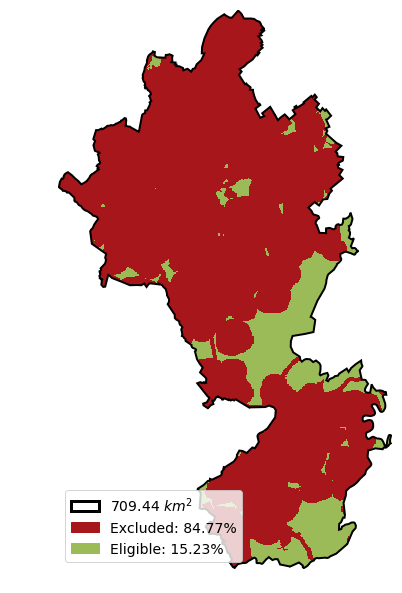

In [2]:
# Choose a region to operate on (Here, a predefined region for Aachen, Germany is used)
regionPath = gl._test_data_['aachenShapefile.shp']

# Initialize ExclusionCalculator object
ec = gl.ExclusionCalculator(regionPath, srs=3035, pixelSize=100)

# Apply Exclusions
ec.excludeRasterType(gl._test_data_["clc-aachen_clipped.tif"], value=(12,22))
ec.excludeRasterType(gl._test_data_["clc-aachen_clipped.tif"], value=(1,2), buffer=1000)
ec.excludeVectorType(gl._test_data_["aachenRoads.shp"], buffer=200, 
                     where="type='motorway' OR type='primary' OR type='trunk'",)

# Draw result
ec.draw()

# Basic placement 

* Separation distance determines the minimal distance between two items 

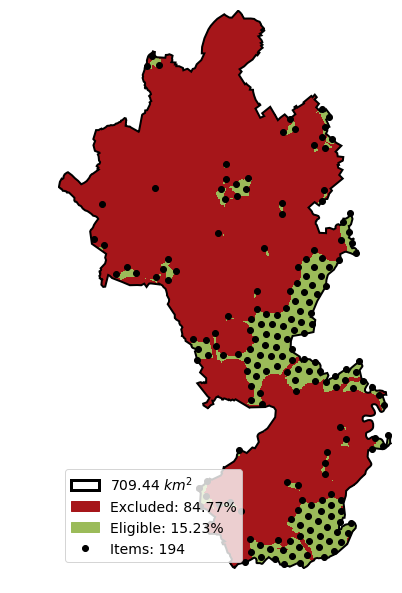

In [3]:
# Do placements
ec.distributeItems(separation=1000)

# Draw result
ec.draw()

In [4]:
# Get the placemnts as XY coordinates
print( ec.itemCoords[:5] )

[[4045900.01 3095999.99]
 [4046525.   3095200.01]
 [4045400.01 3095099.99]
 [4061300.01 3091199.99]
 [4062025.   3090500.01]]


In [5]:
# Repeat placement, but save as a vector file
ec.distributeItems(separation=1000, output="aachen_placements.shp")

# Direction-dependent placements

* Separation distances determines the minimal distance between two items along an 'axial' and 'transverse' direction
* 'axialDirection' orients the axial direction, and is given in degrees (counter-clockwise, relative to East)


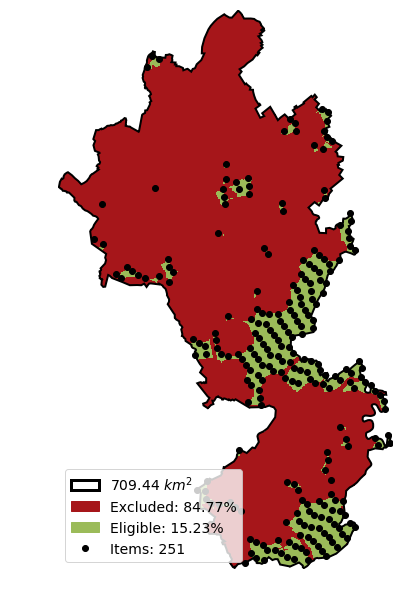

In [6]:
# Do placements
ec.distributeItems(separation=(1200,600), axialDirection=45)

# Draw result
ec.draw()

# Identify placement areas 
* Separation distance determines the minimal distance between two items
* 'asArea=True' invokes the identification of nearby eligible areas using Voronoi ploygons
* Can also (optionally) be saved as an output vector file

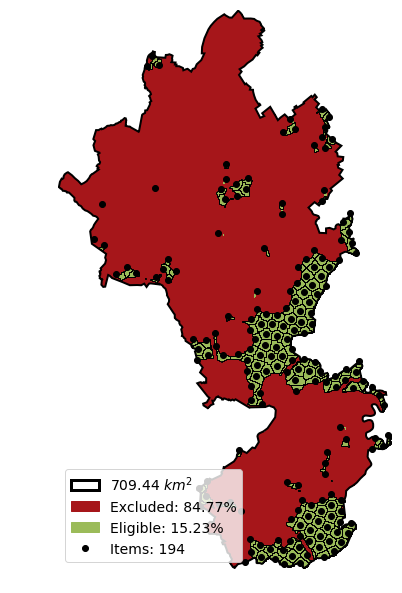

In [7]:
# Do placements
ec.distributeItems(1000, asArea=True, output="aachen_placement_areas.shp")

# Draw result
ec.draw()